 # Customer Retention

# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

- Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. 
- A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. 
- Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. 
- The research furthermore investigated the factors that influence the online customers repeat purchase intention. 
- The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. 
- Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

- The number of column(s) is more than 47. Read the column header carefully.

Note : Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required.   


# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


# Exploratory Data Analysis(EDA)
Firstly to understand about the dataset, we should know how much data is there in the dataset.

In [3]:
# Checking the dimensions of this dataset.
df.shape

(269, 71)

- Data set contains 269 rows and 71 columns.

In [4]:
# checkng the columns present in the dataset.
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

- There is space and characters present in the dataset.

In [5]:
# Remove tabs,space and digits present in column names.
from string import digits
df.columns = df.columns.str.replace('\t','')
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)
df.columns = df.columns.str.strip()


In [6]:
# Cheching the datatypes of all the columns.
df.dtypes

Gender of respondent                                                    object
How old are you?                                                        object
Which city do you shop online from?                                     object
What is the Pin Code of where you shop online from?                      int64
Since How Long You are Shopping Online ?                                object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

- Seems that most of the columns are object variables present in the dataset.
- only 1 int i.e, for column "What is the Pin Code of where you shop online from? "

In [7]:
# For getting the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                     --------------  ----- 
 0   Gender of respondent                                                                                       269 non-null    object
 1   How old are you?                                                                                           269 non-null    object
 2   Which city do you shop online from?                                                                        269 non-null    object
 3   What is the Pin Code of where you shop online from?                                                        269 non-null    int64 
 4   Since How Long You are Shopping Online ?                                        

- There are 1 int and 70 object variables present in the dataset.

In [8]:
# checking the null values in the dataframe
df.isnull().sum()

Gender of respondent                                                    0
How old are you?                                                        0
Which city do you shop online from?                                     0
What is the Pin Code of where you shop online from?                     0
Since How Long You are Shopping Online ?                                0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

- Seems there is no missing value present in the dataset.

In [9]:
df.nunique()

Gender of respondent                                                     2
How old are you?                                                         5
Which city do you shop online from?                                     11
What is the Pin Code of where you shop online from?                     39
Since How Long You are Shopping Online ?                                 5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

- All the Variables or Features are Categorical type.

In [10]:
# Summary statistics
df.describe()

,What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


- As we have only 1 int variable, we have got description of one column only.

# Data Visualization

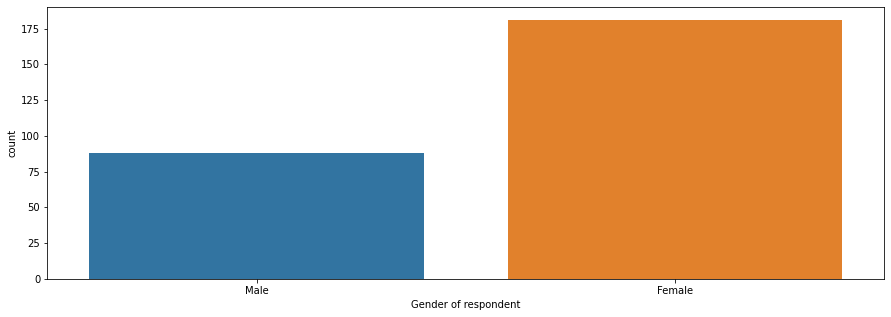

Female    0.672862
Male      0.327138
Name: Gender of respondent, dtype: float64


(Female    181
 Male       88
 Name: Gender of respondent, dtype: int64,
 None)

In [11]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['Gender of respondent'])
plt.show()
df['Gender of respondent'].value_counts() , print(df['Gender of respondent'].value_counts(normalize=True))

In [99]:
df['How old are you?'].value_counts()

1    81
0    79
2    70
4    20
3    19
Name: How old are you?, dtype: int64

<AxesSubplot:xlabel='How old are you?', ylabel='count'>

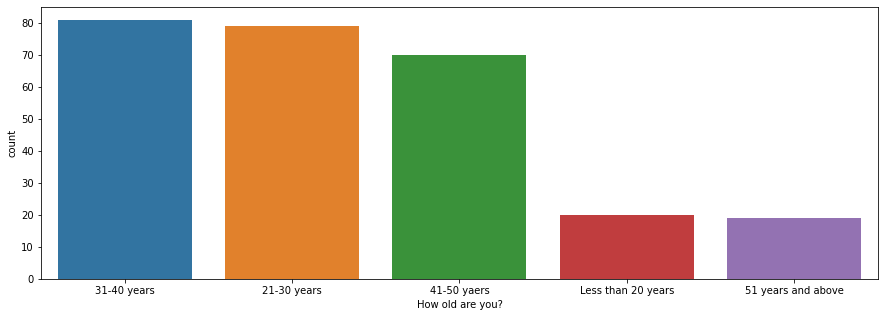

In [12]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['How old are you?'])

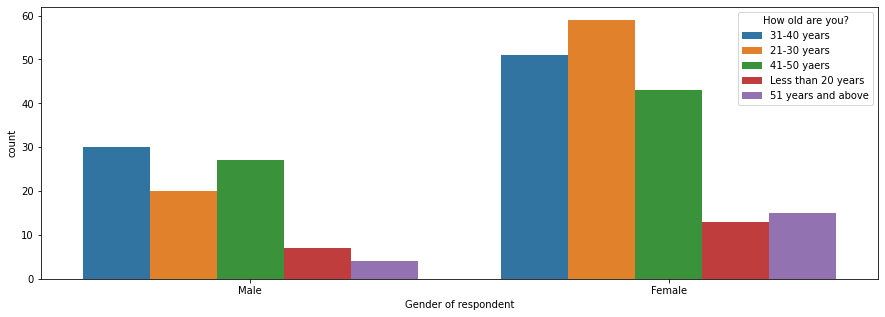

In [13]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(hue='How old are you?',x='Gender of respondent',data=df)
plt.show()

In [14]:
df['Which city do you shop online from?'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Which city do you shop online from?, dtype: int64

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='count'>

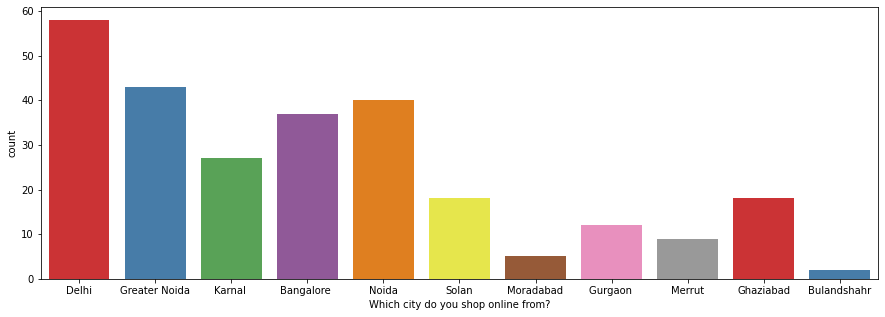

In [15]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['Which city do you shop online from?'], palette="Set1")

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='count'>

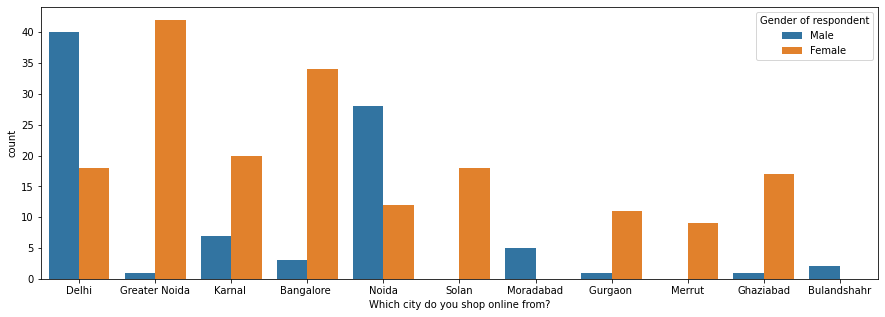

In [16]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['Which city do you shop online from?'], hue=df['Gender of respondent'])

<AxesSubplot:xlabel='Which city do you shop online from?', ylabel='count'>

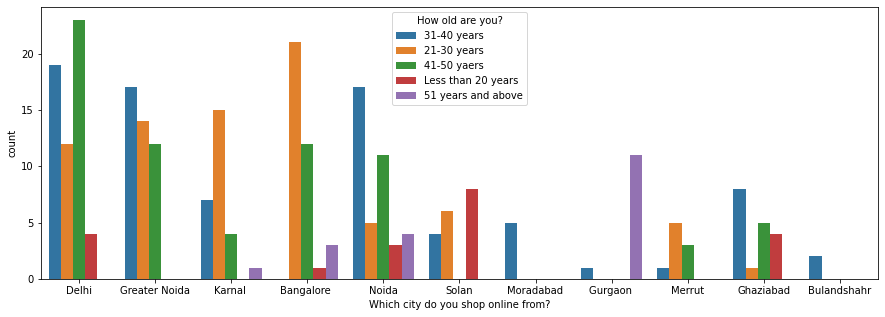

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(df['Which city do you shop online from?'],hue=df['How old are you?'])

In [18]:
df['Since How Long You are Shopping Online ?'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Since How Long You are Shopping Online ?, dtype: int64

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

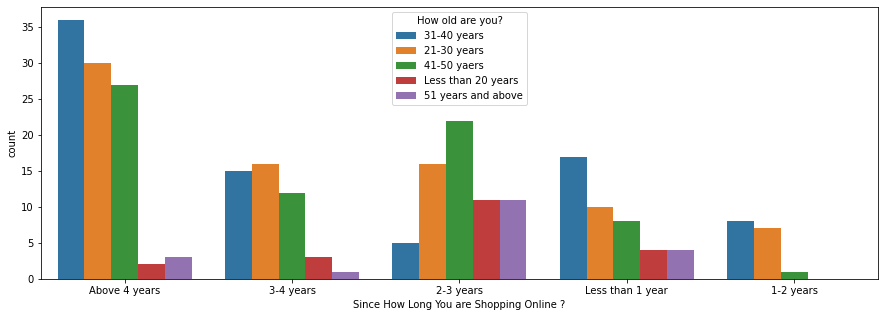

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(df['Since How Long You are Shopping Online ?'],hue=df['How old are you?'])

<AxesSubplot:xlabel='How do you access the internet while shopping on-line?', ylabel='count'>

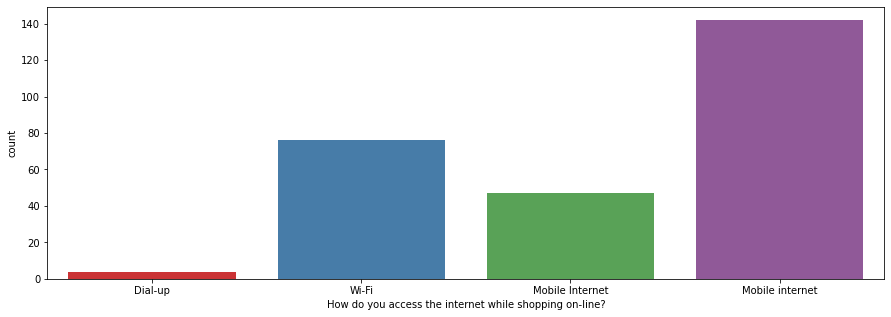

In [20]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['How do you access the internet while shopping on-line?'], palette="Set1")

<AxesSubplot:xlabel='Which device do you use to access the online shopping?', ylabel='count'>

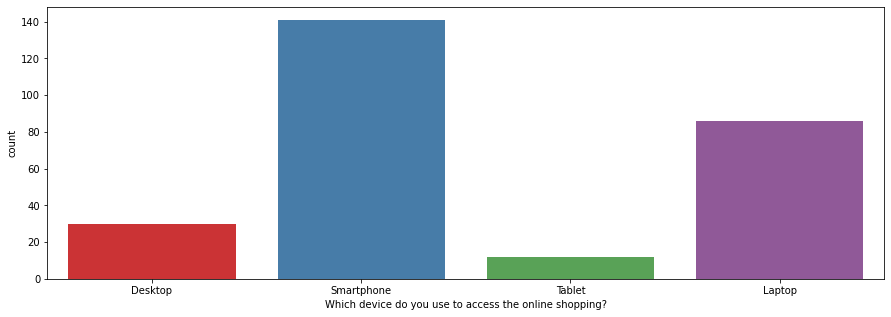

In [21]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['Which device do you use to access the online shopping?'], palette="Set1")

<AxesSubplot:xlabel='Which device do you use to access the online shopping?', ylabel='count'>

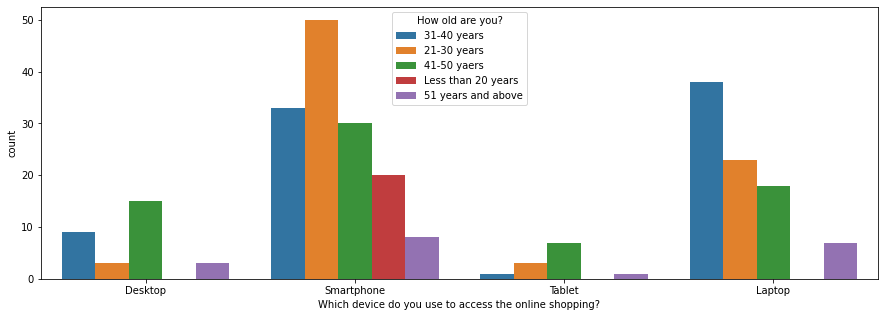

In [22]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['Which device do you use to access the online shopping?'], hue=df['How old are you?'])

<AxesSubplot:xlabel='What is the operating system (OS) of your device?', ylabel='count'>

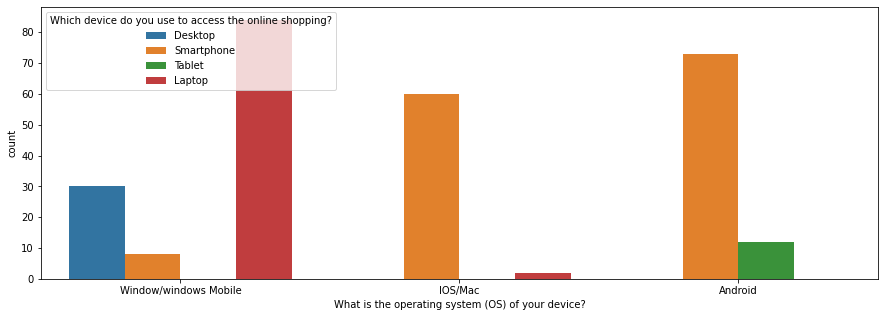

In [23]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['What is the operating system (OS) of your device?'], hue=df['Which device do you use to access the online shopping?'])

<AxesSubplot:xlabel='What is the operating system (OS) of your device?', ylabel='count'>

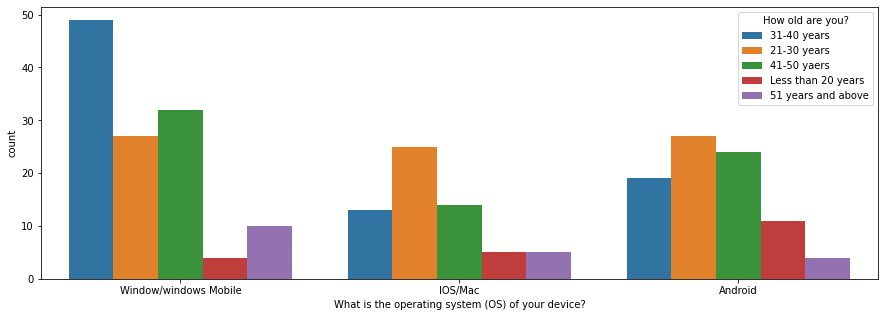

In [24]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['What is the operating system (OS) of your device?'], hue=df['How old are you?'])

<AxesSubplot:xlabel='What browser do you run on your device to access the website?', ylabel='count'>

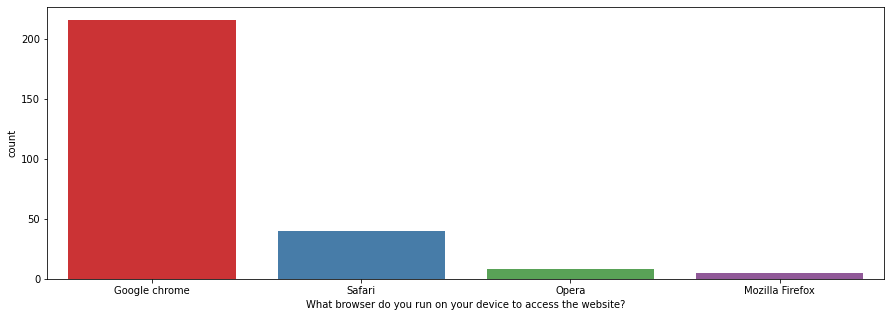

In [25]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['What browser do you run on your device to access the website?'], palette="Set1")

<AxesSubplot:xlabel='What browser do you run on your device to access the website?', ylabel='count'>

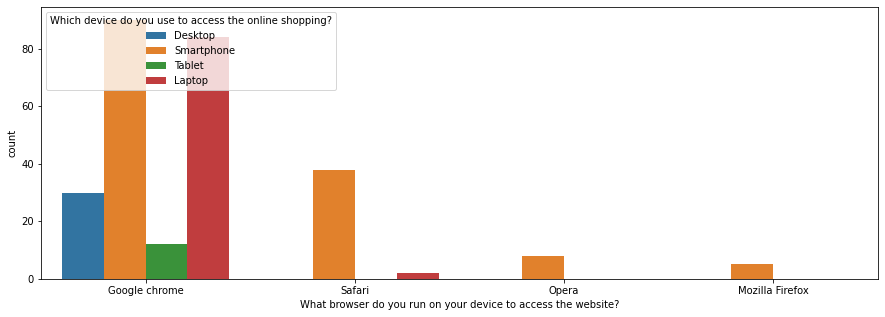

In [26]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['What browser do you run on your device to access the website?'], hue=df['Which device do you use to access the online shopping?'])

<AxesSubplot:xlabel='After first visit, how do you reach the online retail store?', ylabel='count'>

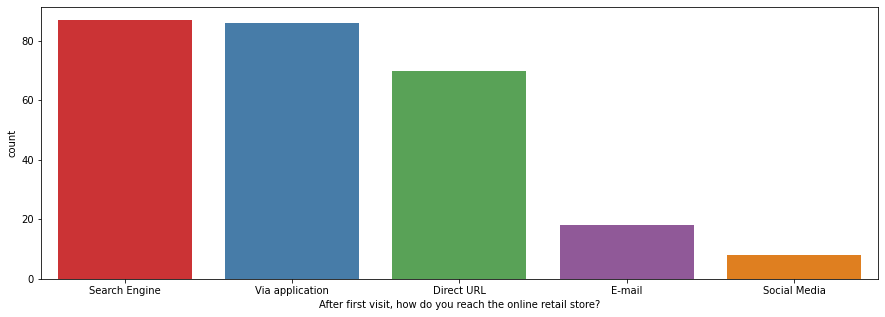

In [27]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['After first visit, how do you reach the online retail store?'], palette="Set1")    

<AxesSubplot:xlabel='How much time do you explore the e- retail store before making a purchase decision?', ylabel='count'>

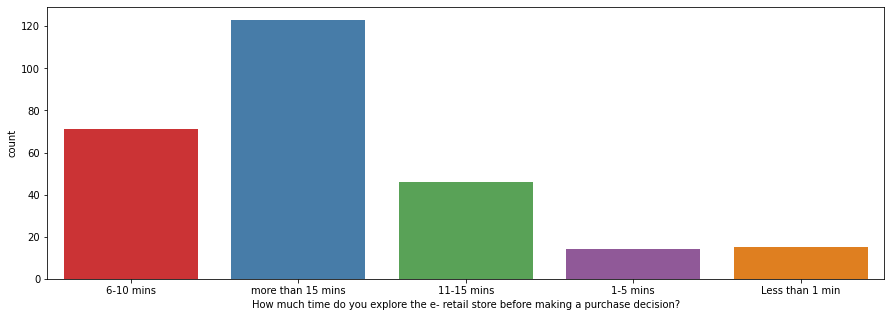

In [28]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['How much time do you explore the e- retail store before making a purchase decision?'], palette="Set1") 

<AxesSubplot:xlabel='What is your preferred payment Option?', ylabel='count'>

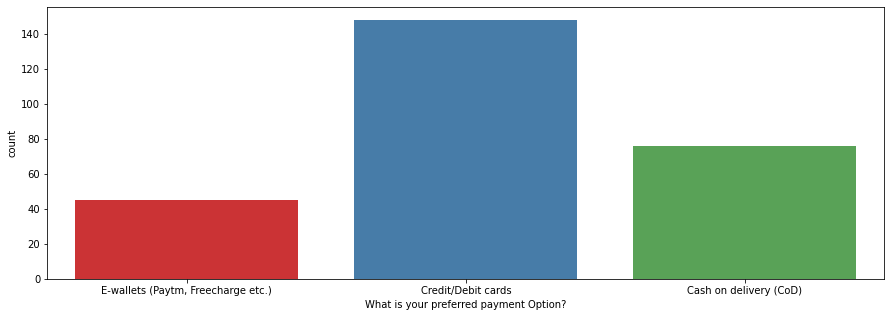

In [29]:
plt.figure(figsize=(15,5),facecolor='white')
sns.countplot(df['What is your preferred payment Option?'], palette="Set1")

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?, dtype: int64


<AxesSubplot:xlabel='How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?', ylabel='count'>

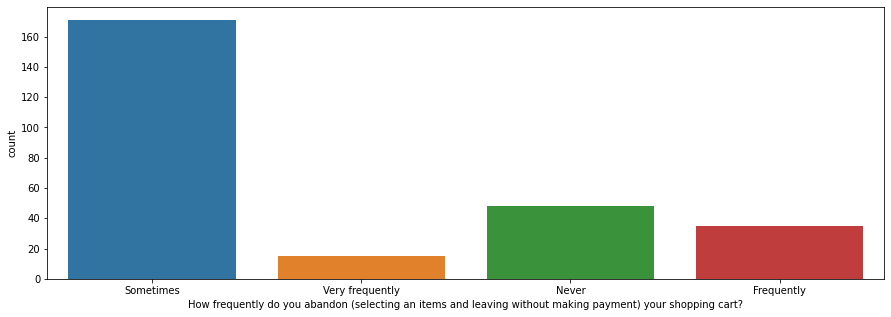

In [30]:
plt.figure(figsize=(15,5))
print(df['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'].value_counts())
sns.countplot(df['How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?'])

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: The content on the website must be easy to read and understand, dtype: int64


<AxesSubplot:xlabel='The content on the website must be easy to read and understand', ylabel='count'>

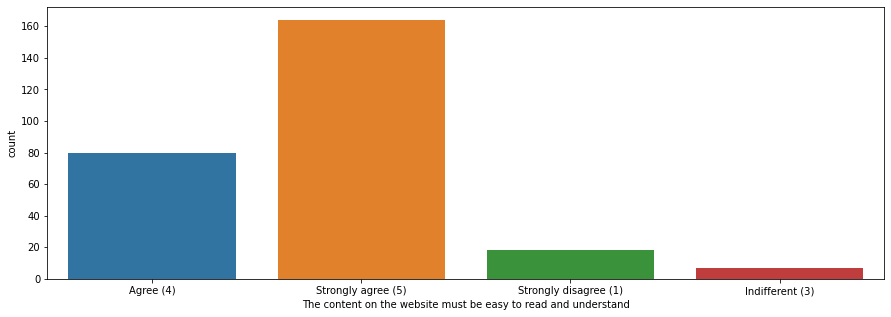

In [31]:
plt.figure(figsize=(15,5))
print(df['The content on the website must be easy to read and understand'].value_counts() )
sns.countplot(df['The content on the website must be easy to read and understand'])

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: Complete information on listed seller and product being offered is important for purchase decision., dtype: int64


<AxesSubplot:xlabel='Complete information on listed seller and product being offered is important for purchase decision.', ylabel='count'>

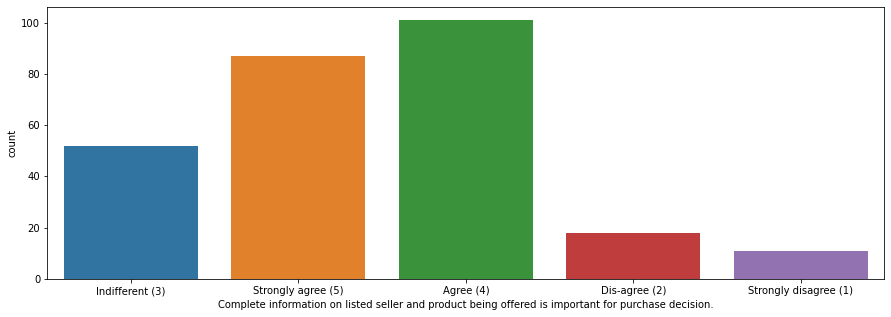

In [32]:
plt.figure(figsize=(15,5))
print(df['Complete information on listed seller and product being offered is important for purchase decision.'].value_counts())
sns.countplot(df['Complete information on listed seller and product being offered is important for purchase decision.'])

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: All relevant information on listed products must be stated clearly, dtype: int64


<AxesSubplot:xlabel='All relevant information on listed products must be stated clearly', ylabel='count'>

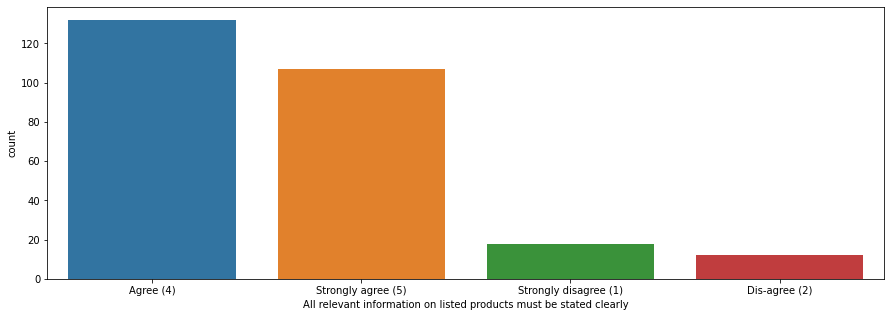

In [33]:
plt.figure(figsize=(15,5))
print(df['All relevant information on listed products must be stated clearly'].value_counts())
sns.countplot(df['All relevant information on listed products must be stated clearly'])

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: Ease of navigation in website, dtype: int64


<AxesSubplot:xlabel='Ease of navigation in website', ylabel='count'>

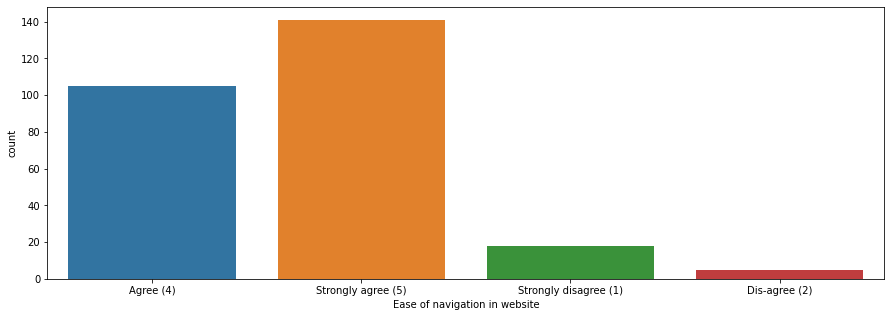

In [34]:
plt.figure(figsize=(15,5))
print(df['Ease of navigation in website'].value_counts())
sns.countplot(df['Ease of navigation in website'])

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Indifferent (3)           12
Strongly disagree (1)     12
Name: Loading and processing speed, dtype: int64


<AxesSubplot:xlabel='Loading and processing speed', ylabel='count'>

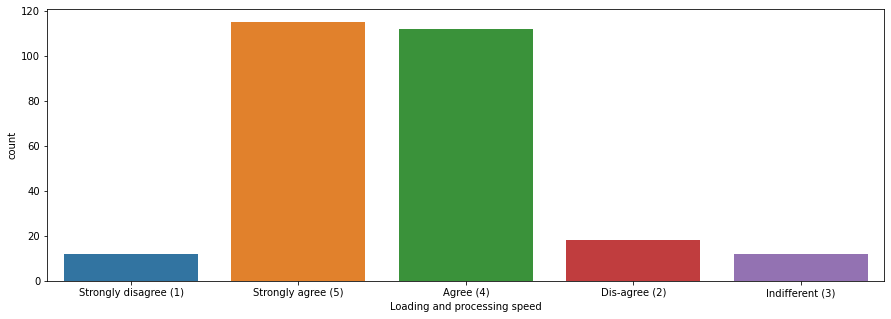

In [35]:
plt.figure(figsize=(15,5))
print(df['Loading and processing speed'].value_counts())
sns.countplot(df['Loading and processing speed'])

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User friendly Interface of the website, dtype: int64


<AxesSubplot:xlabel='User friendly Interface of the website', ylabel='count'>

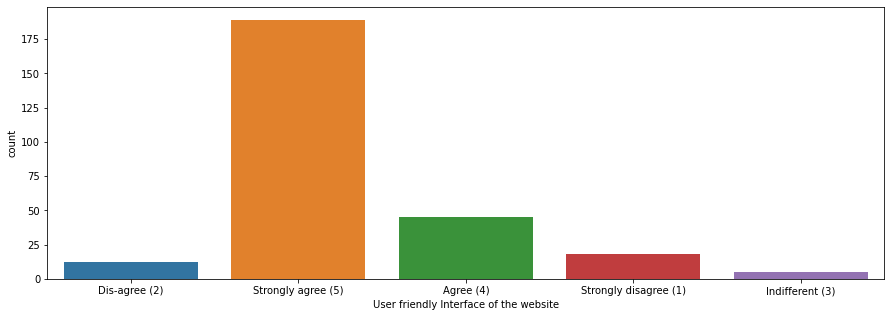

In [36]:
plt.figure(figsize=(15,5))
print(df['User friendly Interface of the website'].value_counts())
sns.countplot(df['User friendly Interface of the website'])

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convenient Payment methods, dtype: int64


<AxesSubplot:xlabel='Convenient Payment methods', ylabel='count'>

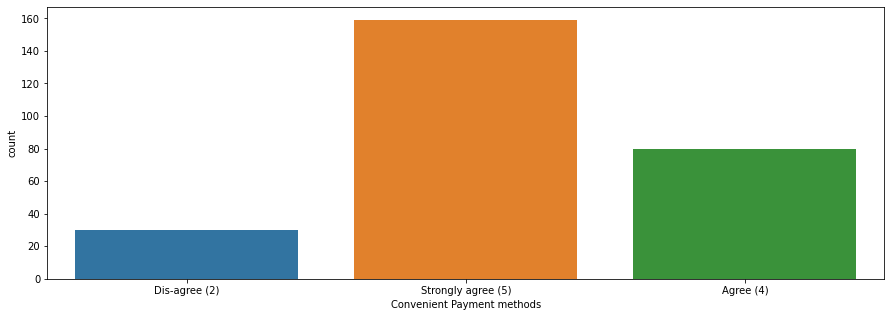

In [37]:
plt.figure(figsize=(15,5))
print(df['Convenient Payment methods'].value_counts())
sns.countplot(df['Convenient Payment methods'])

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64


<AxesSubplot:xlabel='Trust that the online retail store will fulfill its part of the transaction at the stipulated time', ylabel='count'>

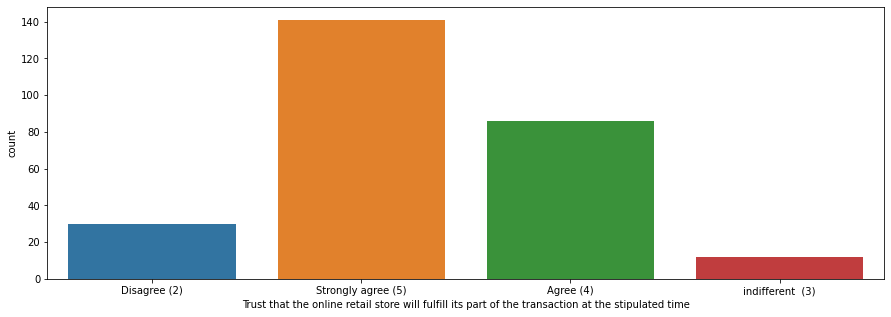

In [38]:
plt.figure(figsize=(15,5))
print(df['Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts())
sns.countplot(df['Trust that the online retail store will fulfill its part of the transaction at the stipulated time'])

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: Empathy (readiness to assist with queries) towards the customers, dtype: int64


<AxesSubplot:xlabel='Empathy (readiness to assist with queries) towards the customers', ylabel='count'>

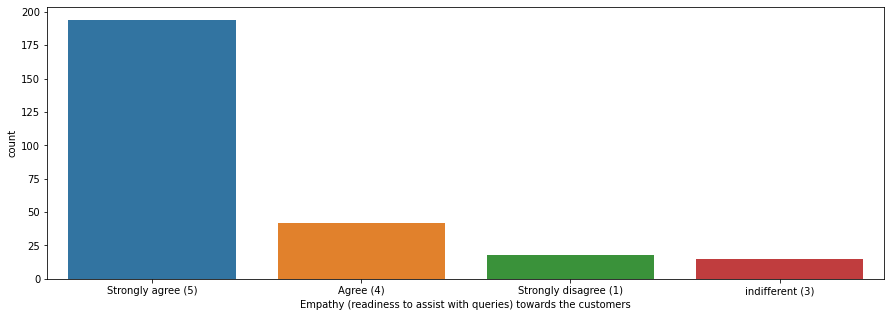

In [39]:
plt.figure(figsize=(15,5))
print(df['Empathy (readiness to assist with queries) towards the customers'].value_counts())
sns.countplot(df['Empathy (readiness to assist with queries) towards the customers'])

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: Being able to guarantee the privacy of the customer, dtype: int64


<AxesSubplot:xlabel='Being able to guarantee the privacy of the customer', ylabel='count'>

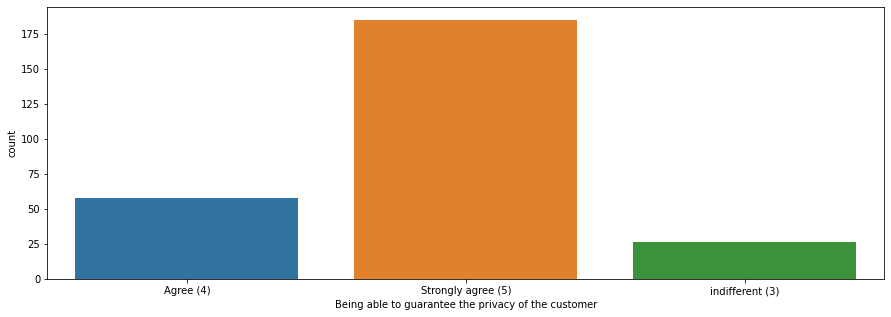

In [40]:
plt.figure(figsize=(15,5))
print(df['Being able to guarantee the privacy of the customer'].value_counts())
sns.countplot(df['Being able to guarantee the privacy of the customer'])

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64


<AxesSubplot:xlabel='Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)', ylabel='count'>

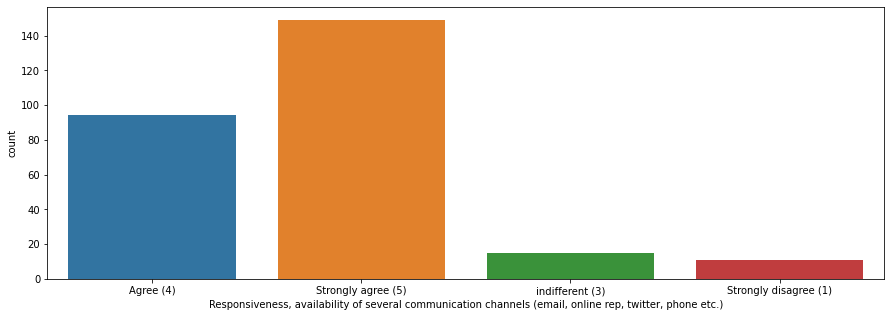

In [41]:
plt.figure(figsize=(15,5))
print(df['Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts())
sns.countplot(df['Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'])

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: Online shopping gives monetary benefit and discounts, dtype: int64


<AxesSubplot:xlabel='Online shopping gives monetary benefit and discounts', ylabel='count'>

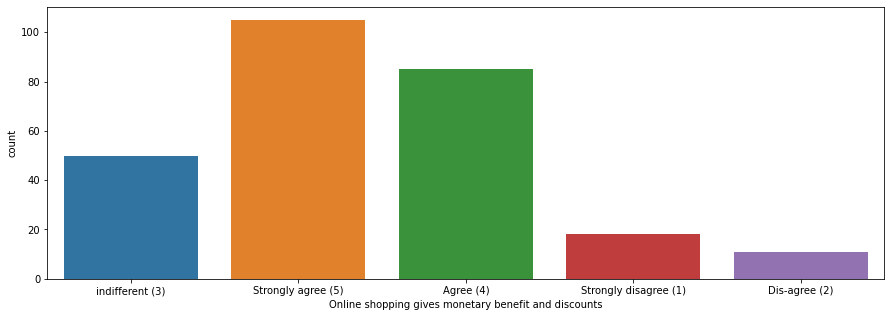

In [42]:
plt.figure(figsize=(15,5))
print(df['Online shopping gives monetary benefit and discounts'].value_counts())
sns.countplot(df['Online shopping gives monetary benefit and discounts'])

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: Enjoyment is derived from shopping online, dtype: int64


<AxesSubplot:xlabel='Enjoyment is derived from shopping online', ylabel='count'>

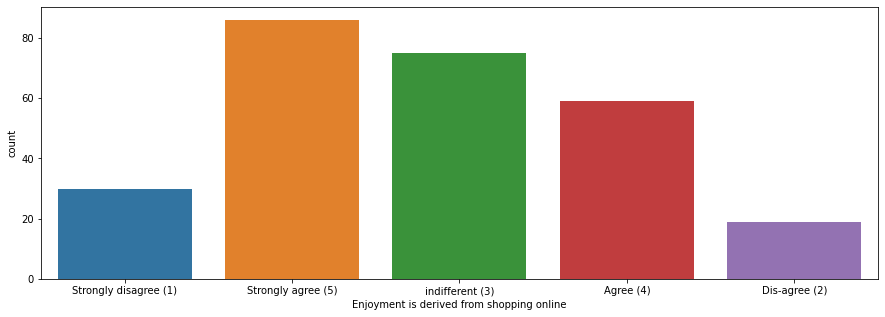

In [43]:
plt.figure(figsize=(15,5))
print(df['Enjoyment is derived from shopping online'].value_counts())
sns.countplot(df['Enjoyment is derived from shopping online'])

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: Shopping online is convenient and flexible, dtype: int64


<AxesSubplot:xlabel='Shopping online is convenient and flexible', ylabel='count'>

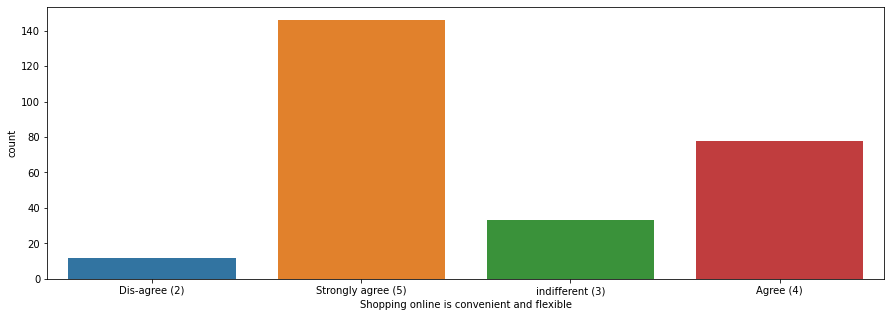

In [44]:
plt.figure(figsize=(15,5))
print(df['Shopping online is convenient and flexible'].value_counts())
sns.countplot(df['Shopping online is convenient and flexible'])

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64


<AxesSubplot:xlabel='Return and replacement policy of the e-tailer is important for purchase decision', ylabel='count'>

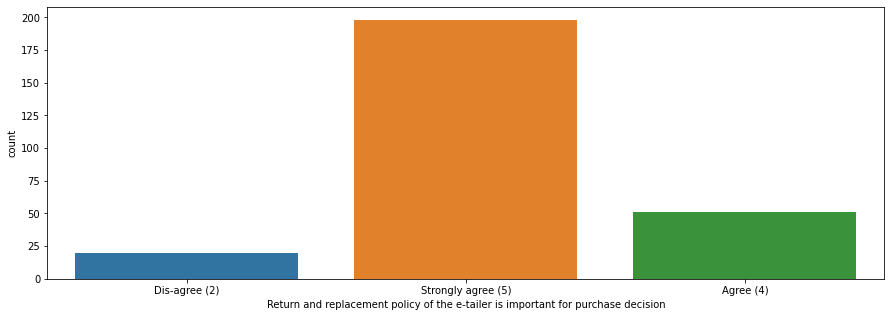

In [45]:
plt.figure(figsize=(15,5))
print(df['Return and replacement policy of the e-tailer is important for purchase decision'].value_counts())
sns.countplot(df['Return and replacement policy of the e-tailer is important for purchase decision'])

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: User derive satisfaction while shopping on a good quality website or application, dtype: int64


<AxesSubplot:xlabel='User derive satisfaction while shopping on a good quality website or application', ylabel='count'>

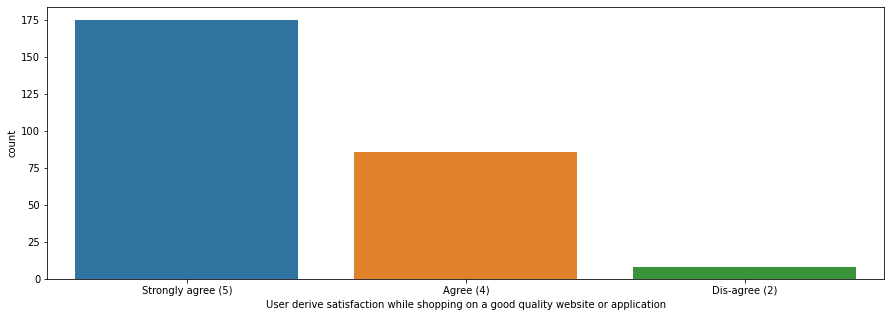

In [46]:
plt.figure(figsize=(15,5))
print(df['User derive satisfaction while shopping on a good quality website or application'].value_counts())
sns.countplot(df['User derive satisfaction while shopping on a good quality website or application'])

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: Offering a wide variety of listed product in several category, dtype: int64


<AxesSubplot:xlabel='Offering a wide variety of listed product in several category', ylabel='count'>

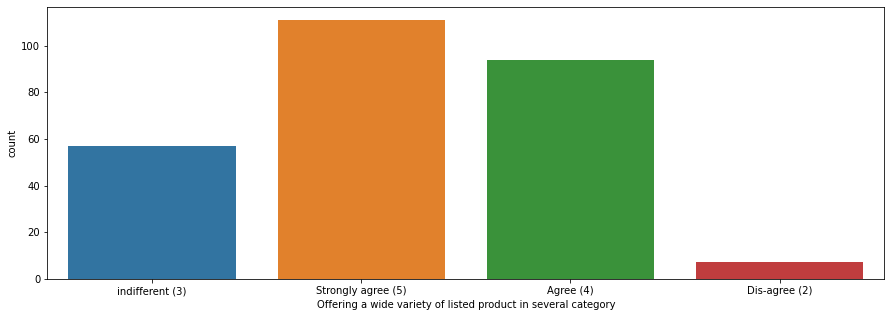

In [47]:
plt.figure(figsize=(15,5))
print(df['Offering a wide variety of listed product in several category'].value_counts())
sns.countplot(df['Offering a wide variety of listed product in several category'])

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: Monetary savings, dtype: int64


<AxesSubplot:xlabel='Monetary savings', ylabel='count'>

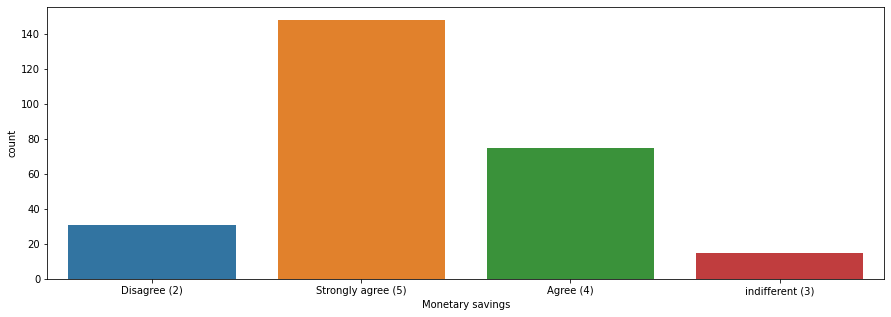

In [48]:
plt.figure(figsize=(15,5))
print(df['Monetary savings'].value_counts())
sns.countplot(df['Monetary savings'])

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64


<AxesSubplot:xlabel='Easy to use website or application', ylabel='count'>

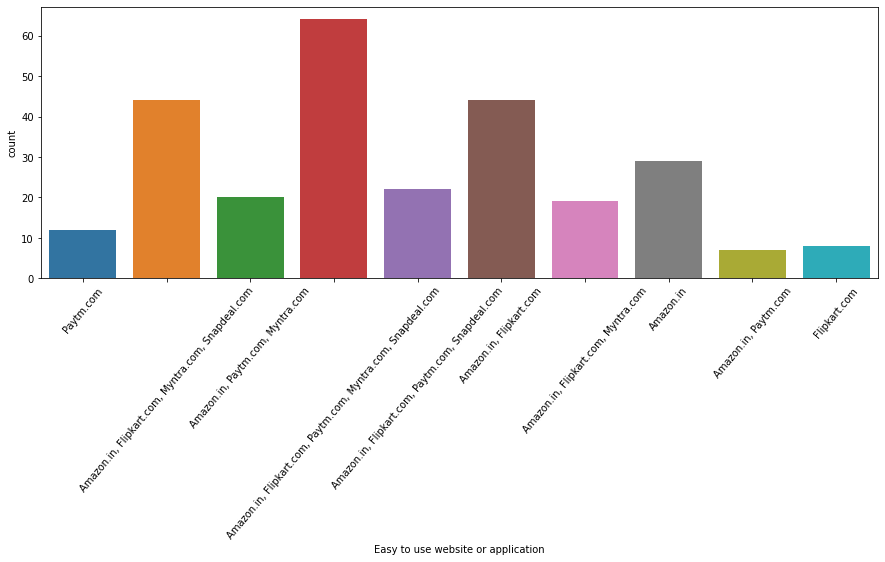

In [49]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Easy to use website or application'].value_counts())
sns.countplot(df['Easy to use website or application'])

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Myntra.com                                                      15
Amazon.in, Myntra.com                                           15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64


<AxesSubplot:xlabel='Visual appealing web-page layout', ylabel='count'>

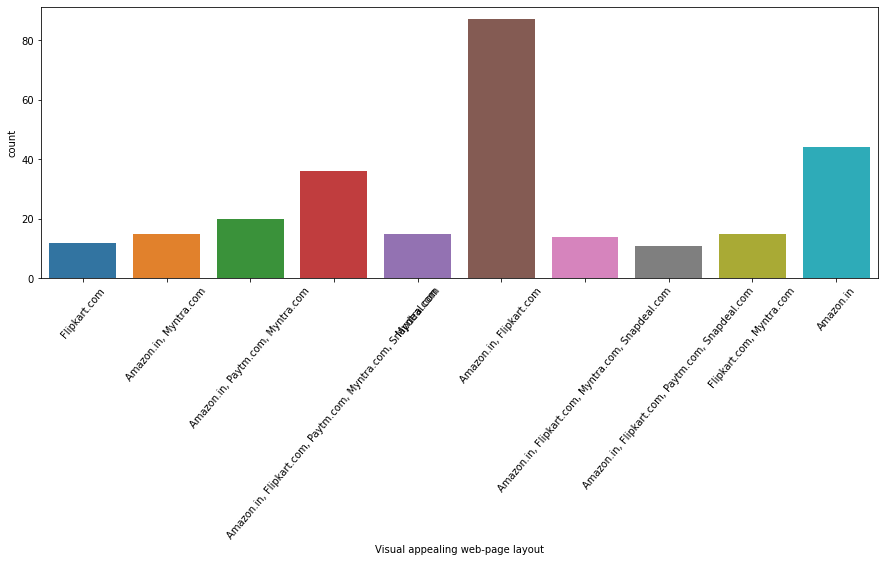

In [50]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Visual appealing web-page layout'].value_counts())
sns.countplot(df['Visual appealing web-page layout'])

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Myntra.com                                            15
Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64


<AxesSubplot:xlabel='Wild variety of product on offer', ylabel='count'>

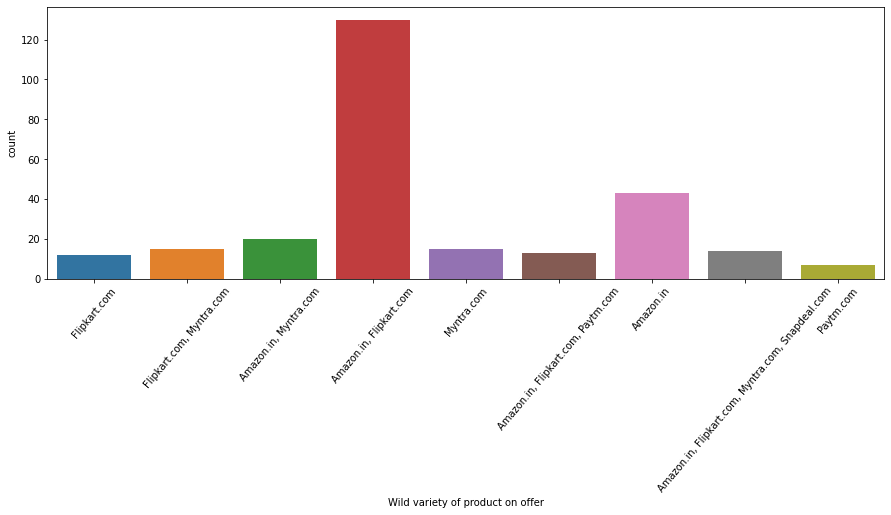

In [51]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Wild variety of product on offer'].value_counts())
sns.countplot(df['Wild variety of product on offer'])

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64


<AxesSubplot:xlabel='Complete, relevant description information of products', ylabel='count'>

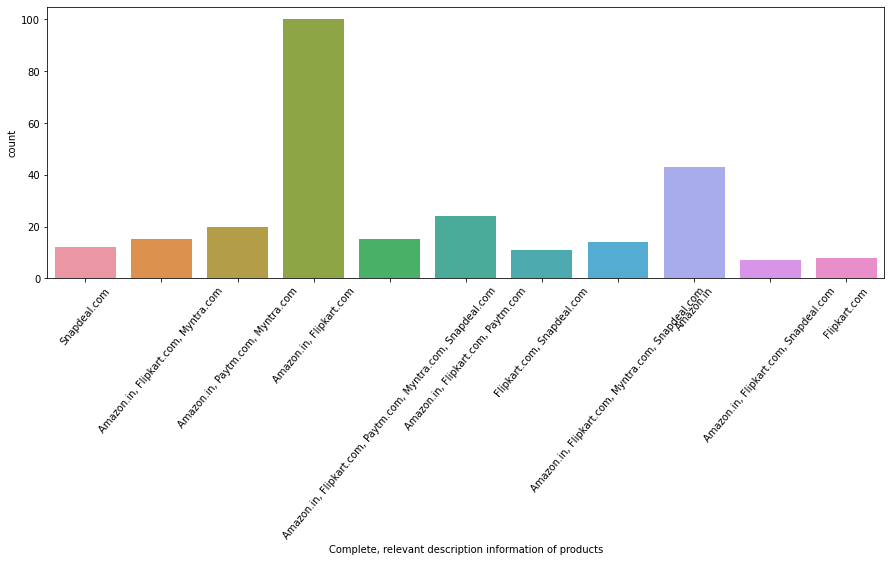

In [52]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Complete, relevant description information of products'].value_counts())
sns.countplot(df['Complete, relevant description information of products'])

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64


<AxesSubplot:xlabel='Fast loading website speed of website and application', ylabel='count'>

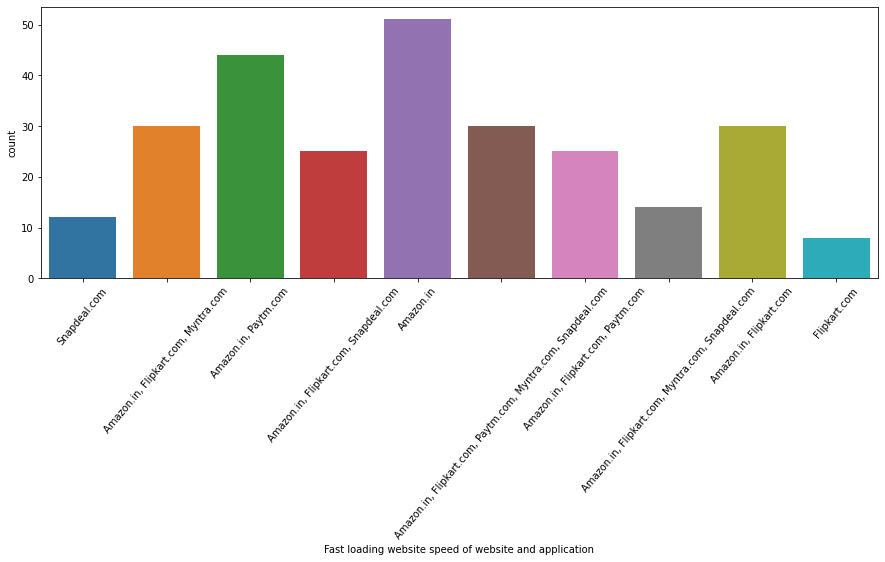

In [53]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Fast loading website speed of website and application'].value_counts())
sns.countplot(df['Fast loading website speed of website and application'])

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64


<AxesSubplot:xlabel='Quickness to complete purchase', ylabel='count'>

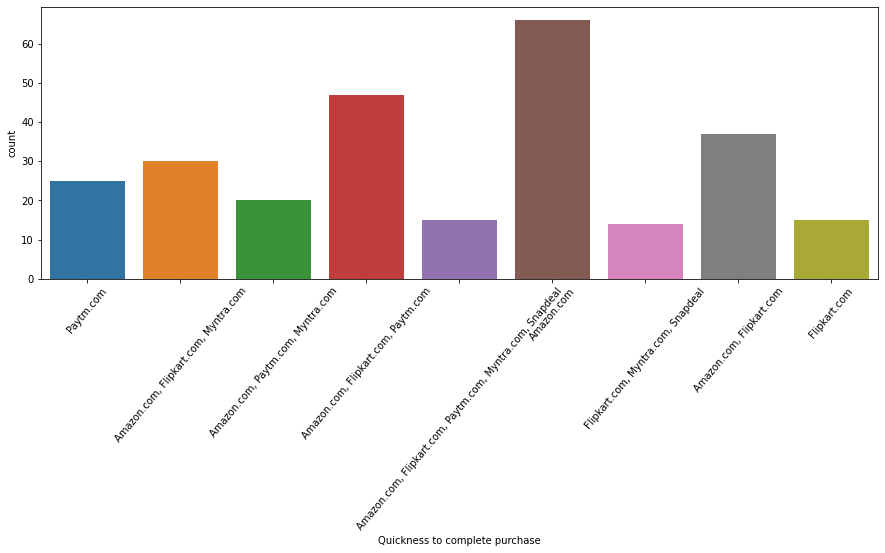

In [54]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Quickness to complete purchase'].value_counts())
sns.countplot(df['Quickness to complete purchase'])

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64


<AxesSubplot:xlabel='Availability of several payment options', ylabel='count'>

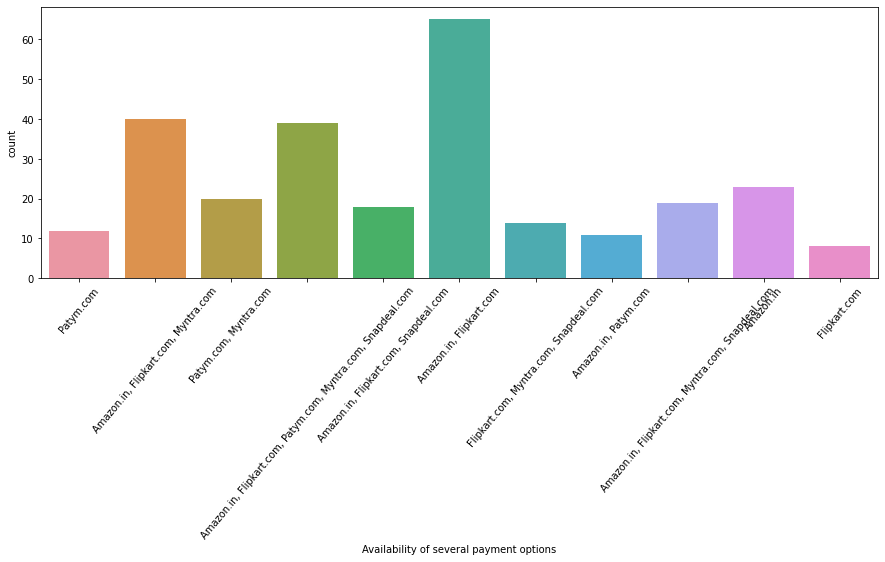

In [55]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Availability of several payment options'].value_counts())
sns.countplot(df['Availability of several payment options'])

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery, dtype: int64


<AxesSubplot:xlabel='Speedy order delivery', ylabel='count'>

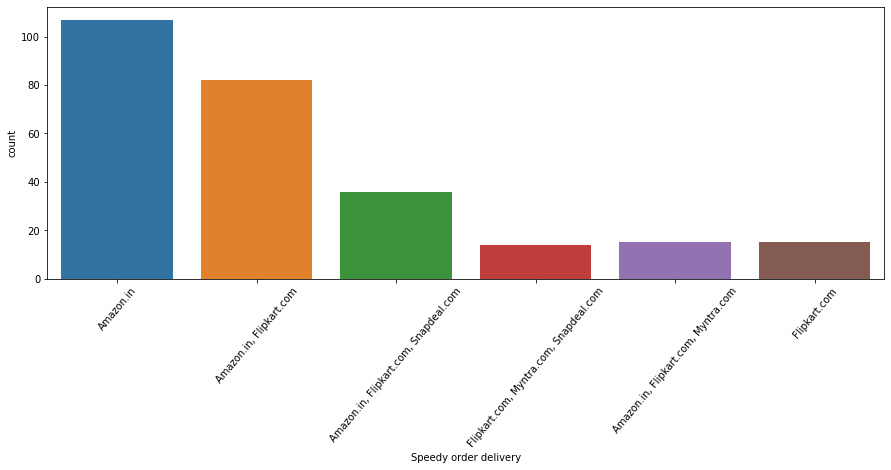

In [56]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Speedy order delivery'].value_counts())
sns.countplot(df['Speedy order delivery'])

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Amazon.in, Paytm.com                                            15
Myntra.com                                                      15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64


<AxesSubplot:xlabel='Privacy of customers’ information', ylabel='count'>

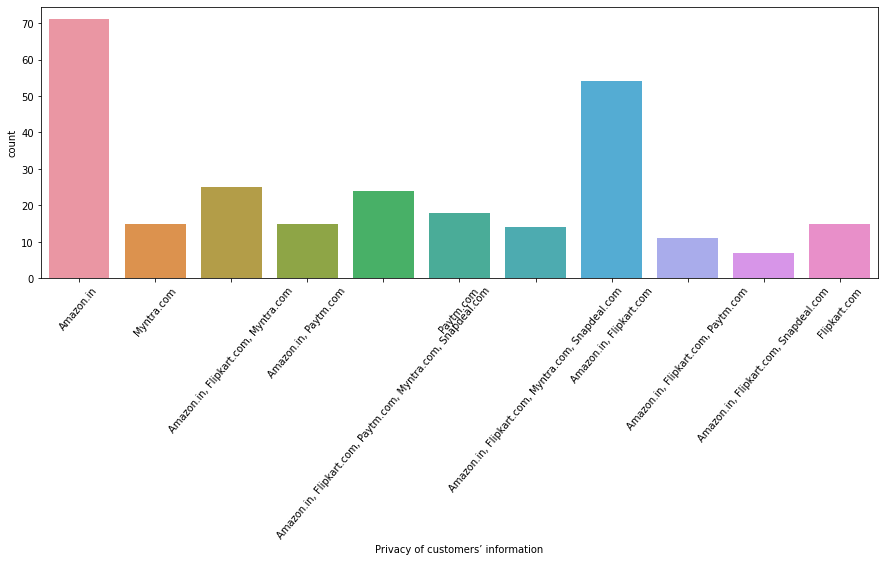

In [57]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Privacy of customers’ information'].value_counts())
sns.countplot(df['Privacy of customers’ information'])

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64


<AxesSubplot:xlabel='Perceived Trustworthiness', ylabel='count'>

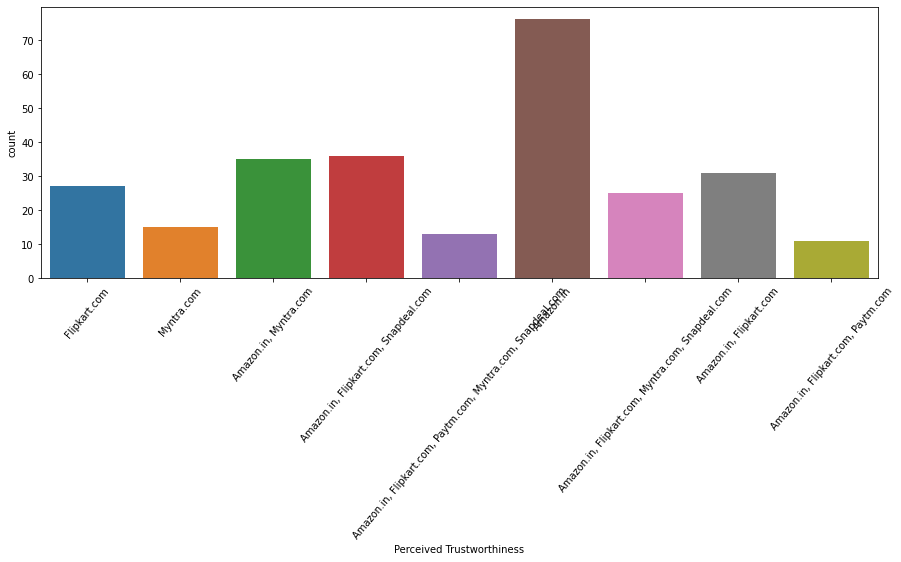

In [58]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Perceived Trustworthiness'].value_counts())
sns.countplot(df['Perceived Trustworthiness'])

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64


<AxesSubplot:xlabel='Presence of online assistance through multi-channel', ylabel='count'>

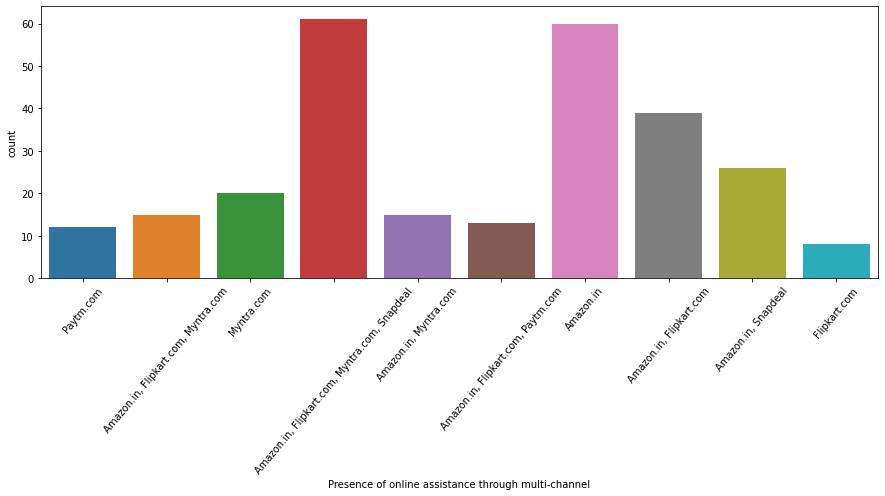

In [59]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Presence of online assistance through multi-channel'].value_counts())
sns.countplot(df['Presence of online assistance through multi-channel'])

Amazon.in                                57
Paytm.com                                38
Amazon.in, Flipkart.com                  38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64


<AxesSubplot:xlabel='Longer time to get logged in (promotion, sales period)', ylabel='count'>

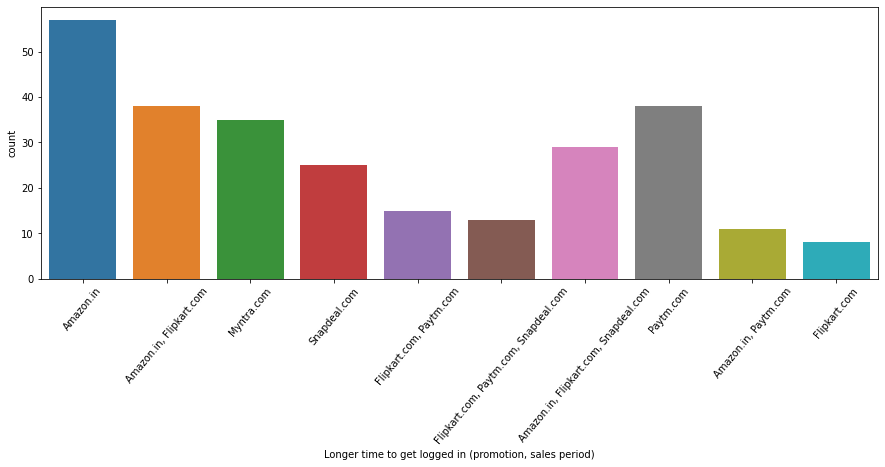

In [60]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Longer time to get logged in (promotion, sales period)'].value_counts())
sns.countplot(df['Longer time to get logged in (promotion, sales period)'])

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Myntra.com                 26
Paytm.com, Snapdeal.com    26
Name: Longer delivery period, dtype: int64


<AxesSubplot:xlabel='Longer delivery period', ylabel='count'>

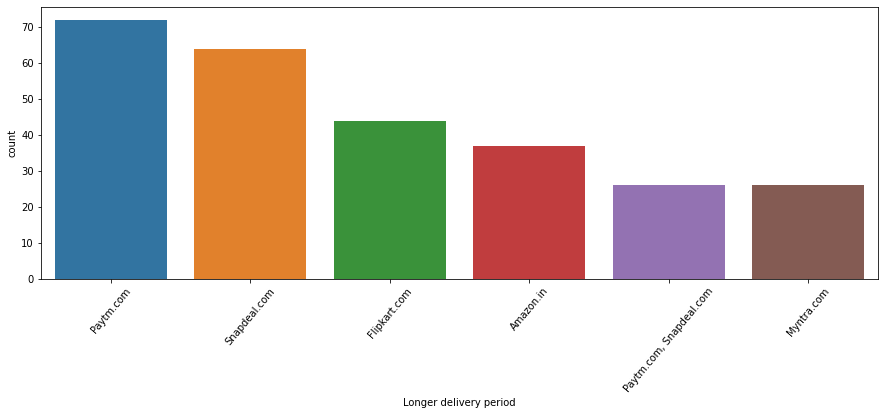

In [61]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Longer delivery period'].value_counts())
sns.countplot(df['Longer delivery period'])

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64


<AxesSubplot:xlabel='Change in website/Application design', ylabel='count'>

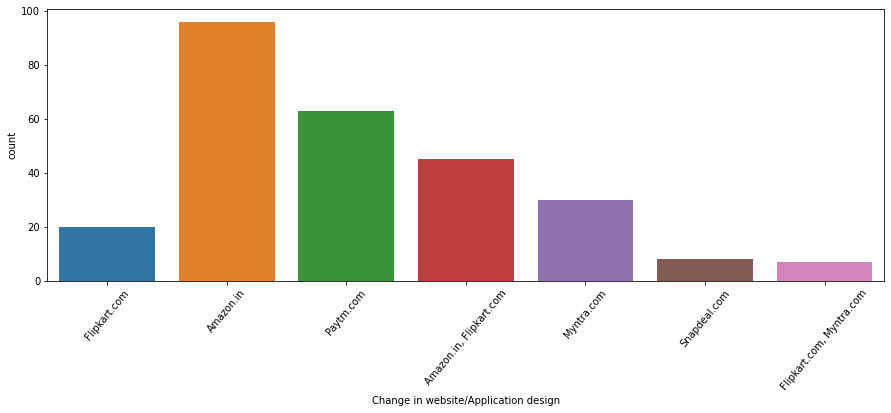

In [62]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Change in website/Application design'].value_counts())
sns.countplot(df['Change in website/Application design'])

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

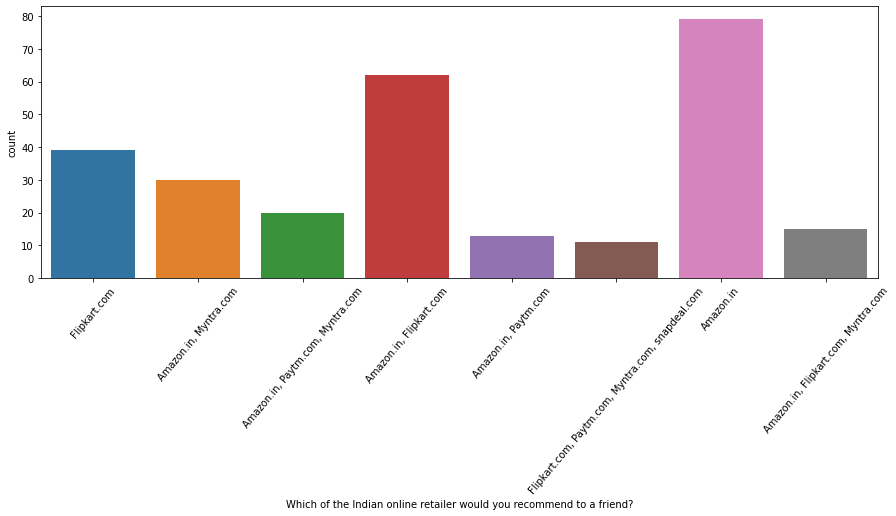

In [63]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=50)
print(df['Which of the Indian online retailer would you recommend to a friend?'].value_counts())
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'])

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

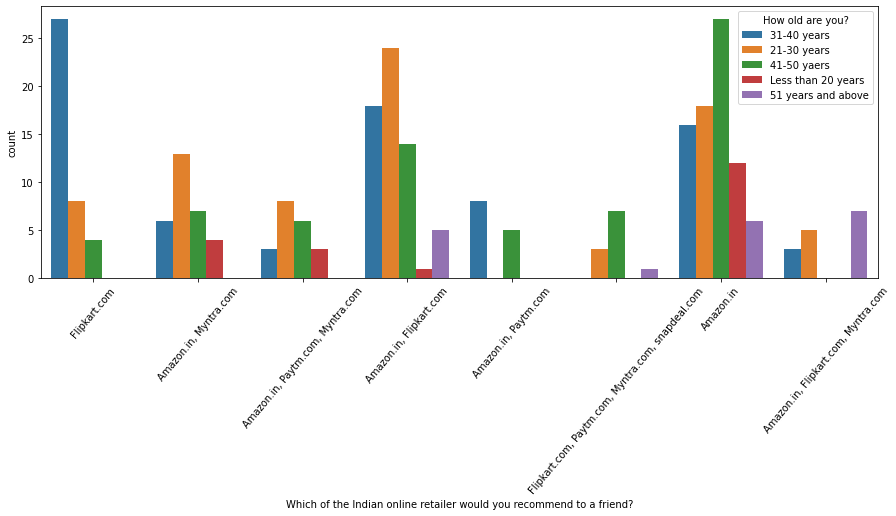

In [64]:
plt.figure(figsize=(15,5),facecolor='white')
plt.xticks(rotation=50)
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'], hue=df['How old are you?'])

<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

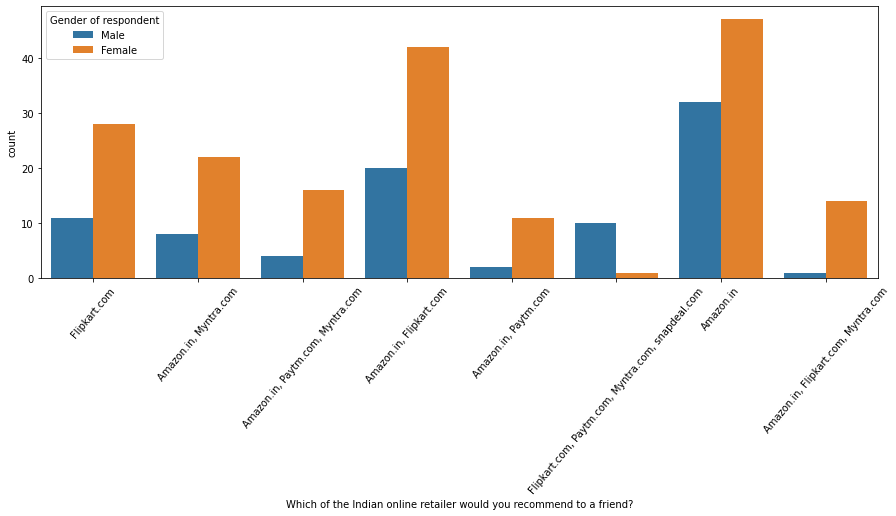

In [65]:
plt.figure(figsize=(15,5),facecolor='white')
plt.xticks(rotation=50)
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'], hue=df['Gender of respondent'])

In [66]:
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=LE.fit_transform(df[i])

In [67]:
# Checking the dataframe after encoding
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,1,1,2,110009,3,2,0,0,3,2,...,0,0,3,5,0,3,2,0,0,6
1,0,0,2,110030,3,3,3,2,0,1,...,1,6,7,10,7,5,0,4,1,3
2,0,0,4,201308,2,3,1,2,2,0,...,7,6,4,7,0,3,5,6,0,5
3,1,0,6,132001,2,5,1,2,2,1,...,9,7,4,8,5,3,1,1,2,1
4,0,0,0,530068,1,0,3,2,0,1,...,5,8,5,8,7,3,0,7,6,3


In [68]:
# Checking statistical summary of the dataset
df.describe()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.327138,1.330855,4.494424,220465.747212,2.323420,3.237918,2.078067,1.501859,2.256506,1.137546,...,4.044610,4.063197,3.843866,5.988848,3.717472,2.736059,2.189591,3.587361,2.133829,2.397770
std,0.470042,1.183774,3.187687,140524.341051,1.176357,1.739331,0.715919,0.751240,0.944942,0.867985,...,3.343218,3.177536,2.103162,2.855321,2.853728,1.725857,2.152169,2.557690,2.171029,2.362991
min,0.000000,0.000000,0.000000,110008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,122018.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,4.000000,201303.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,...,3.000000,4.000000,4.000000,7.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,1.000000,2.000000,7.000000,201310.000000,3.000000,5.000000,3.000000,2.000000,3.000000,2.000000,...,7.000000,7.000000,5.000000,8.000000,7.000000,4.000000,5.000000,6.000000,4.000000,5.000000
max,1.000000,4.000000,10.000000,560037.000000,4.000000,5.000000,3.000000,3.000000,3.000000,2.000000,...,9.000000,9.000000,7.000000,10.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000


Before we got only one column's statistical summary, after label encoding we can able to notice all the columns statistical summary.

- Here the count of all the columns are same which means there are no missing values present in the dataset.
- Some of the columns have their mean value greater than the median (50%), so we can say they are skewed to right.
- In some of the columns, the median is greater than the mean, so the data is skewed to left.
- We can also notice the min value, standard deviation and 25% percentile.
- In summarising the data, we cna notice huge difference between max and 75% percentile in some of the columns which means there are huge outliers present in those columns. 
- Since all the columns in the dataset are categorical, no need to remove outliers and skewness.

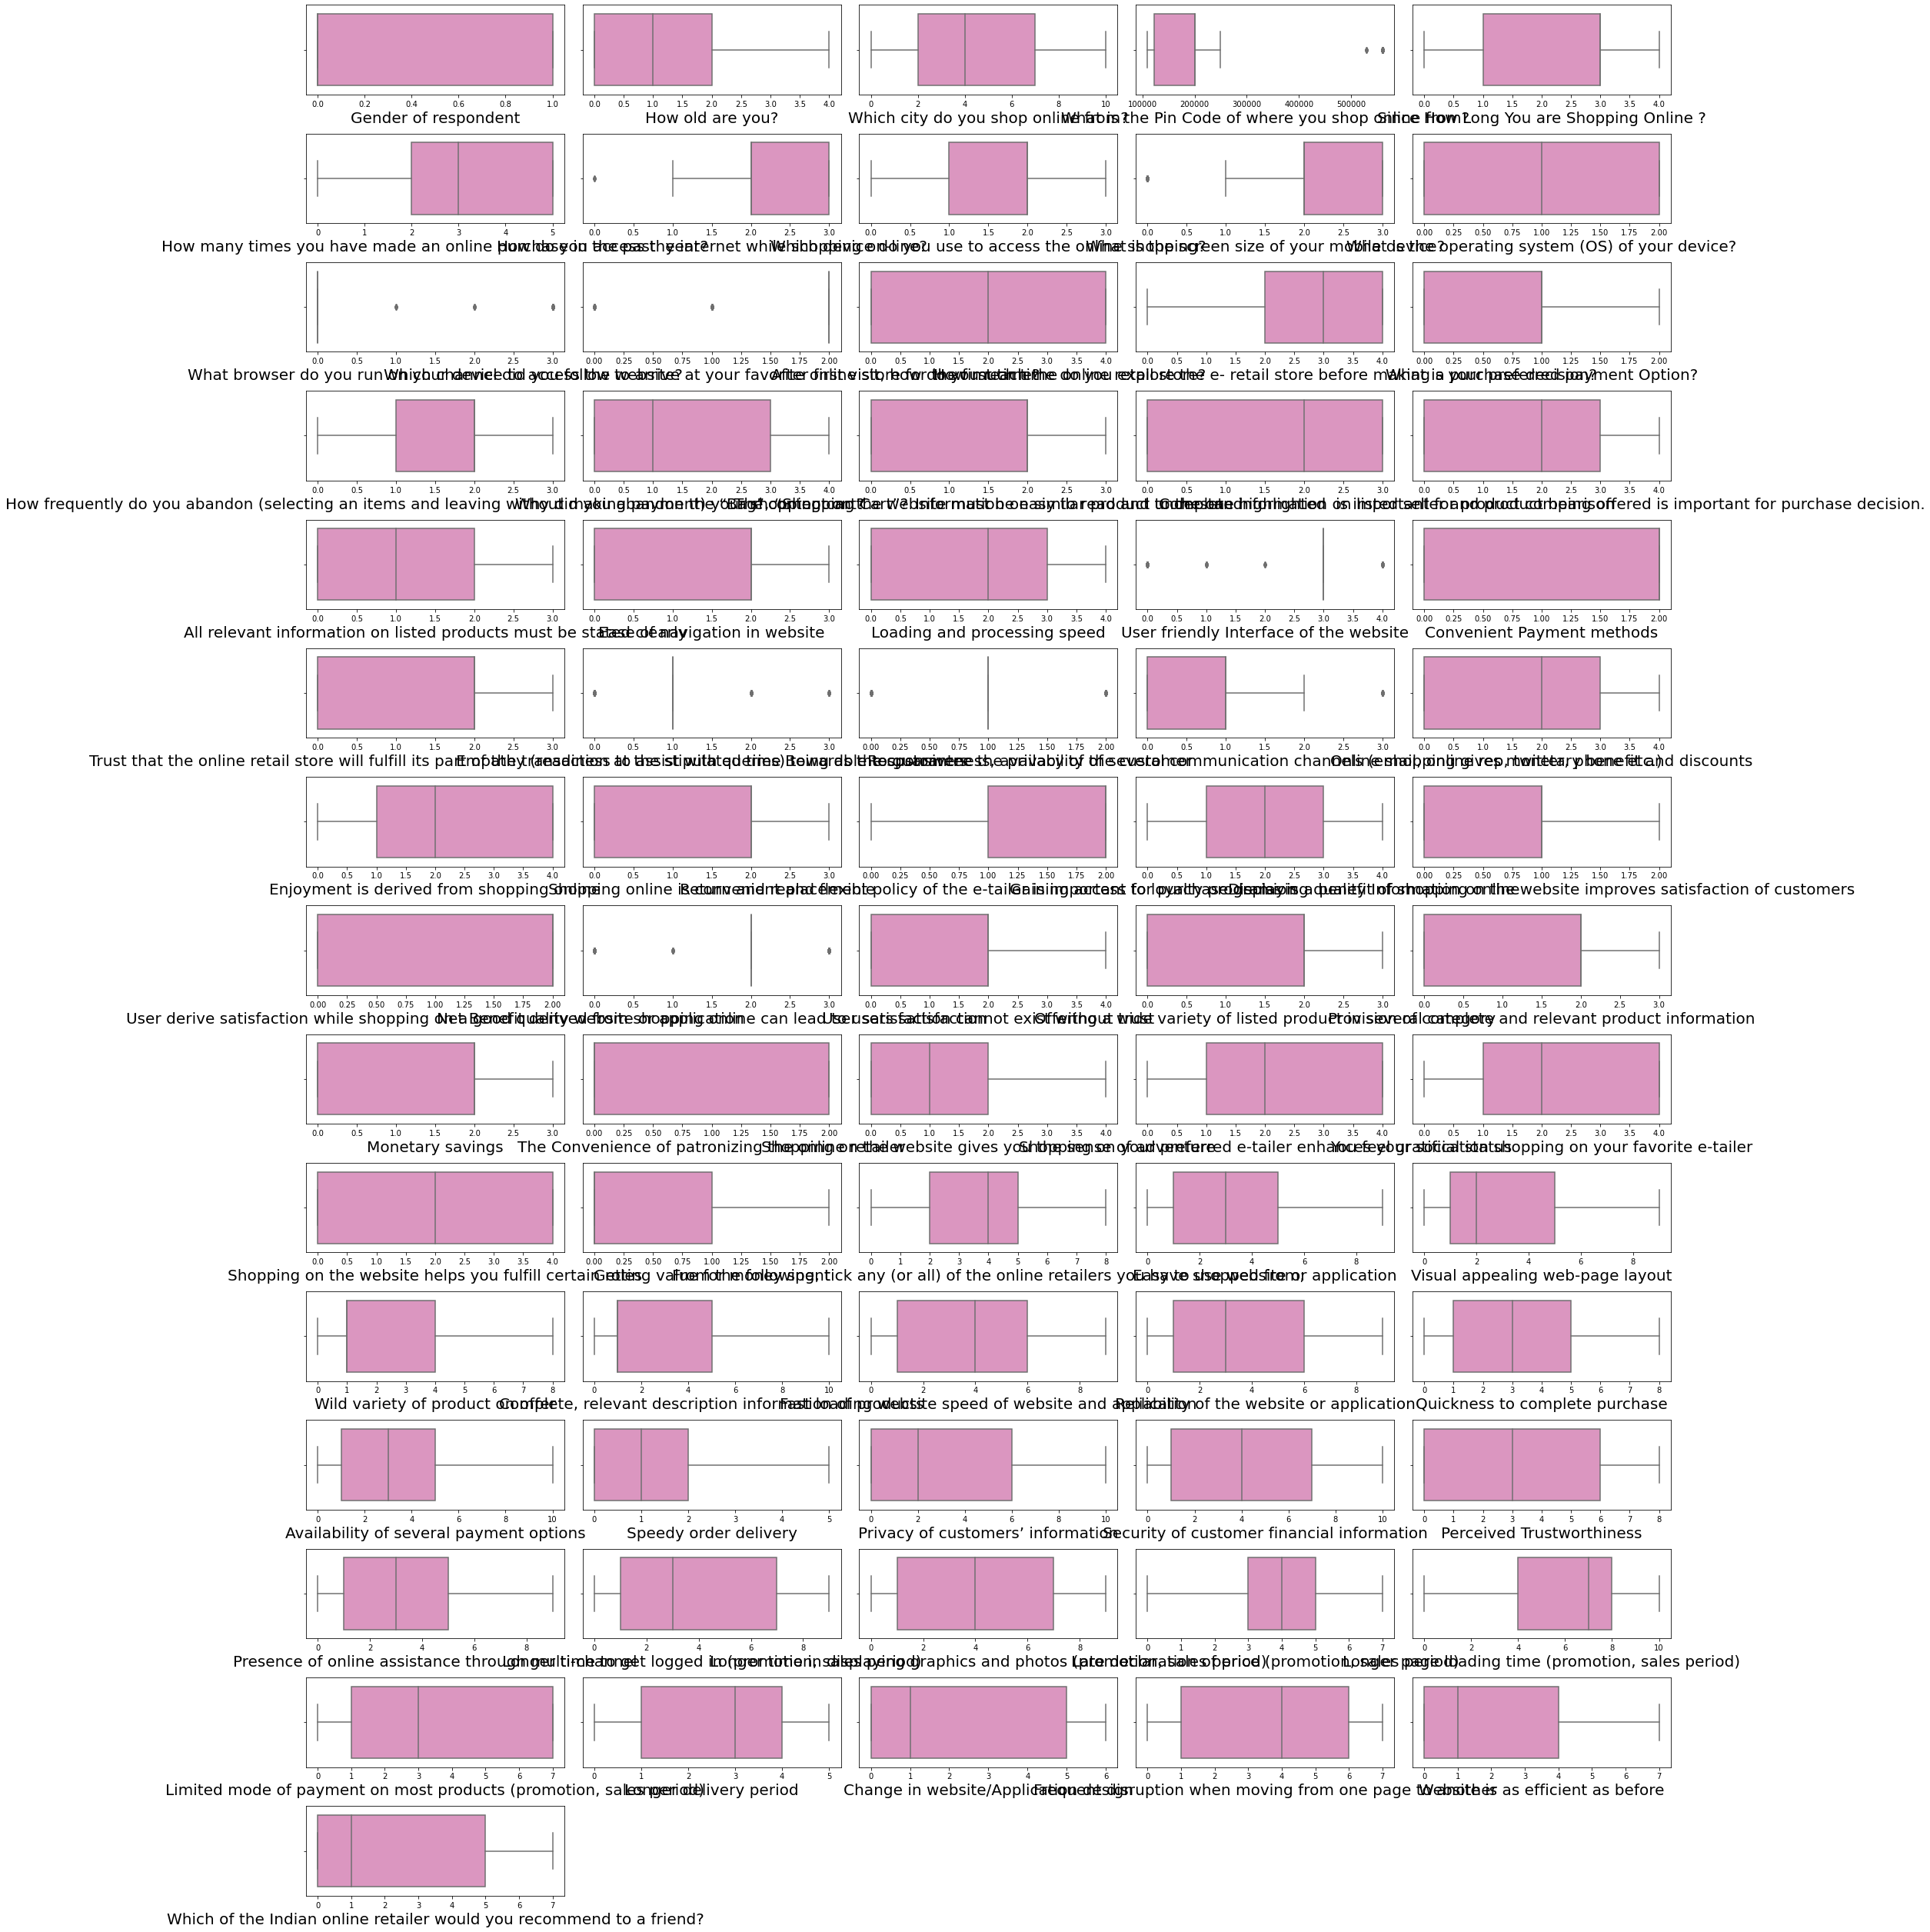

In [69]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=71:
        ax=plt.subplot(15,5,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [70]:
# Checking the skewness
df.skew()

Gender of respondent                                                    0.741028
How old are you?                                                        0.680987
Which city do you shop online from?                                     0.313729
What is the Pin Code of where you shop online from?                     1.748322
Since How Long You are Shopping Online ?                               -0.276968
                                                                          ...   
Longer delivery period                                                 -0.147702
Change in website/Application design                                    0.354163
Frequent disruption when moving from one page to another               -0.100608
Website is as efficient as before                                       0.662084
Which of the Indian online retailer would you recommend to a friend?    0.583614
Length: 71, dtype: float64

- The outliers present in many of the columns but the dataset contains all the categorical data so no need to remove the outliers.
- Skewness is also present in many of the columns but all the columns are categorical so no need to remove skewness also.

In [71]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
Gender of respondent,1.000000,0.046169,0.080912,-0.260365,-0.057096,0.077876,-0.309029,0.061673,0.028794,-0.019243,...,-0.101925,-0.228744,-0.061374,0.008289,-0.158941,0.060838,-0.164818,-0.256638,0.055663,-0.003372
How old are you?,0.046169,1.000000,0.113712,-0.120704,-0.087847,0.309575,0.255594,0.022383,-0.006101,-0.048087,...,-0.281877,-0.095850,-0.064601,-0.128064,-0.198658,-0.156173,-0.134558,-0.018825,-0.008582,-0.135263
Which city do you shop online from?,0.080912,0.113712,1.000000,-0.416597,-0.138329,0.173871,-0.010436,0.020650,0.199296,-0.051642,...,-0.065450,-0.115453,-0.293441,-0.104340,-0.263921,-0.123369,0.000427,0.019167,0.007117,-0.142123
What is the Pin Code of where you shop online from?,-0.260365,-0.120704,-0.416597,1.000000,-0.090049,-0.263685,0.005511,-0.004980,-0.211198,-0.053901,...,-0.085194,0.089605,-0.070046,-0.026817,0.054532,-0.078660,-0.058715,0.039936,0.037662,-0.045388
Since How Long You are Shopping Online ?,-0.057096,-0.087847,-0.138329,-0.090049,1.000000,0.013315,0.226883,-0.125240,0.139924,0.274201,...,0.154763,-0.063386,0.305533,0.086616,0.159591,0.218641,0.220347,0.025919,-0.024316,0.136106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Longer delivery period,0.060838,-0.156173,-0.123369,-0.078660,0.218641,-0.130651,0.101297,-0.104665,0.048533,0.397953,...,0.268484,0.365030,0.598200,0.797480,0.593167,1.000000,0.329965,0.475654,0.247471,0.428419
Change in website/Application design,-0.164818,-0.134558,0.000427,-0.058715,0.220347,0.007841,0.147770,-0.052146,0.418180,0.059894,...,0.370649,0.152655,0.035417,0.225618,0.214103,0.329965,1.000000,0.436573,-0.189925,0.423877
Frequent disruption when moving from one page to another,-0.256638,-0.018825,0.019167,0.039936,0.025919,-0.127148,0.349813,0.084876,-0.065658,0.111380,...,0.274454,0.603750,0.332032,0.614528,0.506431,0.475654,0.436573,1.000000,0.363440,0.122953
Website is as efficient as before,0.055663,-0.008582,0.007117,0.037662,-0.024316,-0.124076,0.266932,0.333868,-0.100462,-0.128611,...,0.122555,-0.010967,0.123087,0.319264,0.275338,0.247471,-0.189925,0.363440,1.000000,0.252154


# For building a machine learning model we will having 'Which of the Indian online retailer would you recommend to a friend?' as our target variable

In [72]:
# Splitting Data into target and Input
x=df.drop(['Which of the Indian online retailer would you recommend to a friend?'],axis=1)
y=df['Which of the Indian online retailer would you recommend to a friend?']

In [73]:
x.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?,What is the operating system (OS) of your device?,...,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before
0,1,1,2,110009,3,2,0,0,3,2,...,9,0,0,3,5,0,3,2,0,0
1,0,0,2,110030,3,3,3,2,0,1,...,2,1,6,7,10,7,5,0,4,1
2,0,0,4,201308,2,3,1,2,2,0,...,8,7,6,4,7,0,3,5,6,0
3,1,0,6,132001,2,5,1,2,2,1,...,3,9,7,4,8,5,3,1,1,2
4,0,0,0,530068,1,0,3,2,0,1,...,5,5,8,5,8,7,3,0,7,6


In [74]:
y.head()

0    6
1    3
2    5
3    1
4    3
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int32

In [75]:
x.shape, y.shape

((269, 70), (269,))

# Applying Standard scaler to independent variables

In [76]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables

# Decision Tree is Configured for 200 Random State

In [77]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i) 

98.87640449438202 at random_state 0
100.0 at random_state 1
100.0 at random_state 2
100.0 at random_state 3
100.0 at random_state 4
97.75280898876404 at random_state 5
98.87640449438202 at random_state 6
100.0 at random_state 7
100.0 at random_state 8
98.87640449438202 at random_state 9
100.0 at random_state 10
98.87640449438202 at random_state 11
98.87640449438202 at random_state 12
100.0 at random_state 13
100.0 at random_state 14
100.0 at random_state 15
100.0 at random_state 16
98.87640449438202 at random_state 17
98.87640449438202 at random_state 18
100.0 at random_state 19
98.87640449438202 at random_state 20
97.75280898876404 at random_state 21
97.75280898876404 at random_state 22
100.0 at random_state 23
100.0 at random_state 24
100.0 at random_state 25
100.0 at random_state 26
100.0 at random_state 27
100.0 at random_state 28
98.87640449438202 at random_state 29
100.0 at random_state 30
98.87640449438202 at random_state 31
96.62921348314607 at random_state 32
98.87640449438202

In [78]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  4


# Splitting Training Set & Test Set.

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 4)

In [80]:
# Applying Logistic Regression on train and test data
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

[1 0 1 2 1 1 7 0 0 3 5 7 0 1 1 6 6 6 1 0 0 2 1 3 0 5 0 0 0 7 2 6 1 2 0 6 1
 0 0 0 1 3 1 1 3 1 4 0 2 5 3 1 1 5 0 1 0 5 5 1 1 3 0 6 7 2 6 3 1 7 1 6 3 6
 2 1 3 4 6 0 1]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         5

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [81]:
# Applying Decision Tree Classifier on train and test data
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc) 

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         5

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [82]:
# Applying Random Forest Classifier on train and test data
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         5

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [83]:
# Applying Support Vector Classifier on train and test data
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         5

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [84]:
# Applying KNN Classifier on train and test data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         5

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



# K-fold Cross Validation

In [85]:
# Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True)

In [86]:
# Logistic regression 
print(cross_val_score(lg,x,y,cv=cross_validation).mean())

1.0


In [87]:
# Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=cross_validation).mean())

0.9888888888888889


In [88]:
# Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=cross_validation).mean())

1.0


In [89]:
# Support Vector Classifier
print(cross_val_score(SV,x,y,cv=cross_validation).mean())

1.0


In [90]:
#  KNN Classifier
print(cross_val_score(knn,x,y,cv=cross_validation).mean())

1.0


# Best Model Selection
- lets use KNN as the best model.

# Hyperparameter & GridsearchCV

In [91]:
parameter = {'n_neighbors' : [1,2,4,5],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree'],
            'leaf_size': [30],
            'metric':['minkowski']}

In [92]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=cross_validation)
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'n_neighbors': [1, 2, 4, 5],
                         'weights': ['uniform', 'distance']})

In [93]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [94]:
Final_mod = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30,metric= 'minkowski',n_neighbors = 1,weights= 'uniform')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

100.0


# Exporting Model with Joblib Library

In [95]:
# Model is exported as .pkl file with the help of joblib library.
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

In [96]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 1, 2, 1, 1, 7, 0, 0, 3, 5, 7, 0, 1, 1, 6, 6, 6, 1, 0, 0, 2,
       1, 3, 0, 5, 0, 0, 0, 7, 2, 6, 1, 2, 0, 6, 1, 0, 0, 0, 1, 3, 1, 1,
       3, 1, 4, 0, 2, 5, 3, 1, 1, 5, 0, 1, 0, 5, 5, 1, 1, 3, 0, 6, 7, 2,
       6, 3, 1, 7, 1, 6, 3, 6, 2, 1, 3, 4, 6, 0, 1])

In [97]:
predicted=np.array(knn.predict(x_test))
predicted
predicted.shape
knn.predict(x_test)

array([1, 0, 1, 2, 1, 1, 7, 0, 0, 3, 5, 7, 0, 1, 1, 6, 6, 6, 1, 0, 0, 2,
       1, 3, 0, 5, 0, 0, 0, 7, 2, 6, 1, 2, 0, 6, 1, 0, 0, 0, 1, 3, 1, 1,
       3, 1, 4, 0, 2, 5, 3, 1, 1, 5, 0, 1, 0, 5, 5, 1, 1, 3, 0, 6, 7, 2,
       6, 3, 1, 7, 1, 6, 3, 6, 2, 1, 3, 4, 6, 0, 1])

In [98]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,1,1
1,0,0
2,1,1
3,2,2
4,1,1
...,...,...
76,3,3
77,4,4
78,6,6
79,0,0
